## Import neccesary libarys

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the DataSet

In [90]:
# Load the dataset
# data = pd.read_csv('bank.csv' , sep=';')
data = pd.read_csv('bank-full.csv' , sep=';')

# View the first few rows
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [91]:
#view the last few rows
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


## Sanity check data

In [92]:
# Check the shape of the data
# cloums and rows
data.shape

(45211, 17)

In [93]:
# Check column information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [94]:
# Check for missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [95]:
#check for duplicates
data.duplicated().sum()

np.int64(0)

In [96]:
#identify the unique values and garbage values
for i in data.select_dtypes(include='object').columns:
    print(f'\nUnique values in {i} are {data[i].unique()}')


Unique values in job are ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unique values in marital are ['married' 'single' 'divorced']

Unique values in education are ['tertiary' 'secondary' 'unknown' 'primary']

Unique values in default are ['no' 'yes']

Unique values in housing are ['yes' 'no']

Unique values in loan are ['no' 'yes']

Unique values in contact are ['unknown' 'cellular' 'telephone']

Unique values in month are ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Unique values in poutcome are ['unknown' 'failure' 'other' 'success']

Unique values in y are ['no' 'yes']


## Exploratory Data Analysis (EDA)

In [97]:
# Descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [98]:
data.describe(include='object').T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


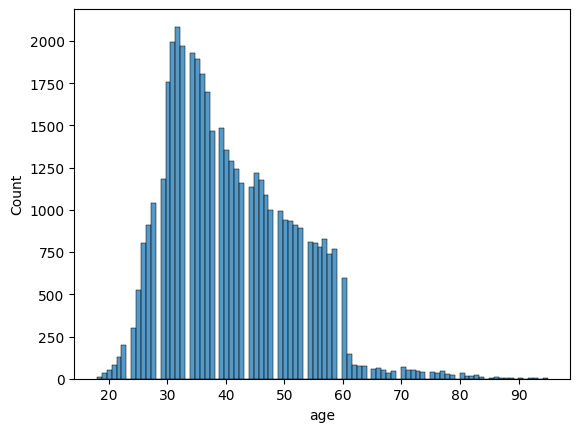

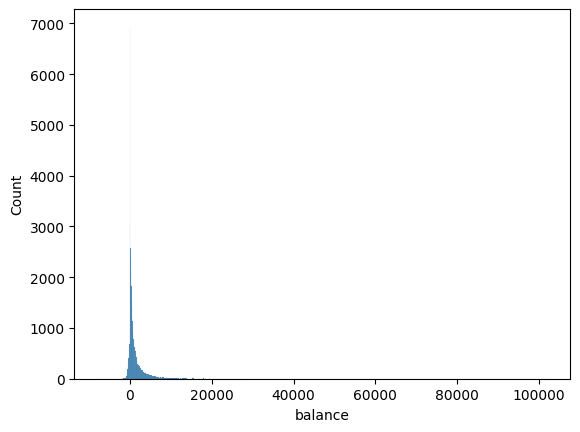

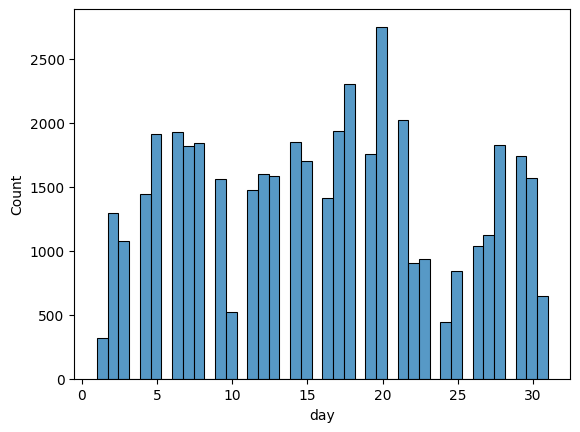

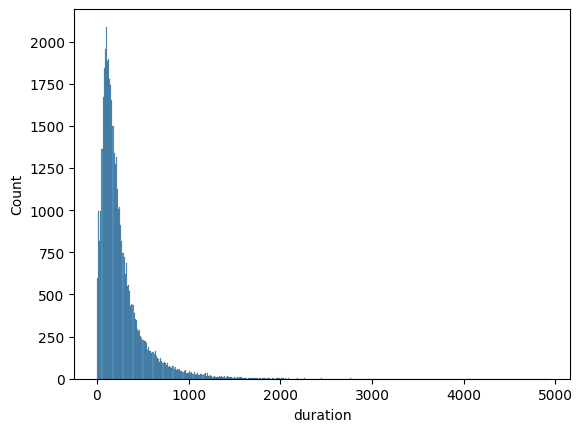

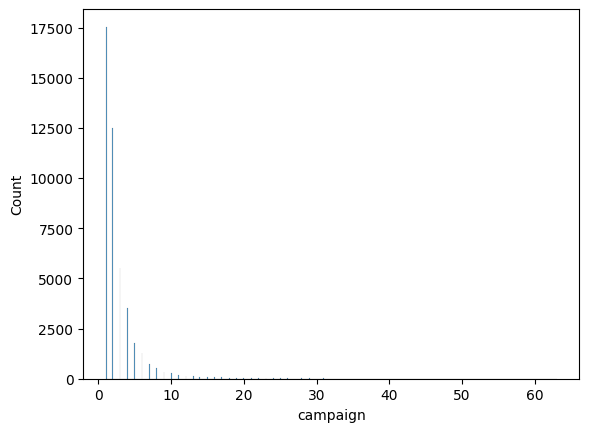

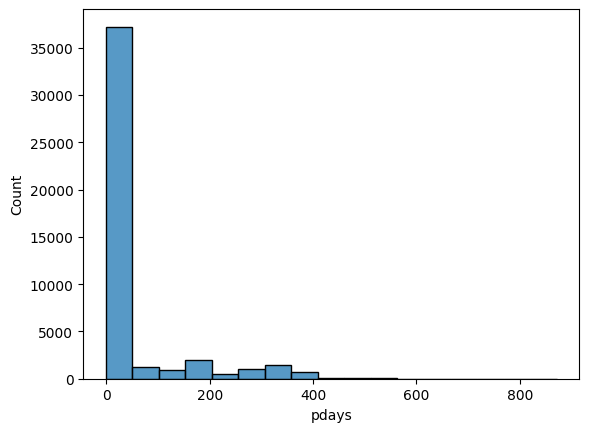

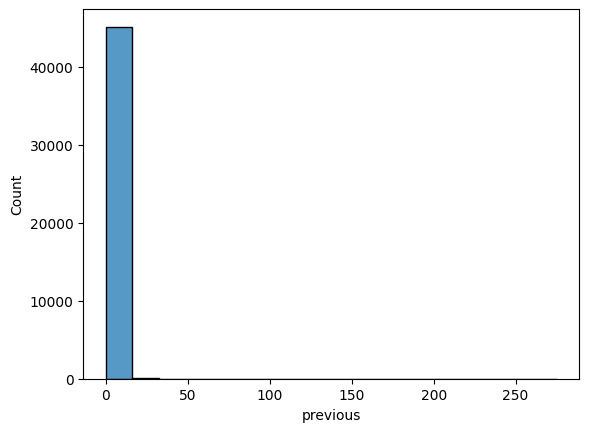

In [99]:
#histogram to understand the distribution of the data
for i in data.select_dtypes(include='number').columns:
    sns.histplot(data=data, x= i)
    plt.show()

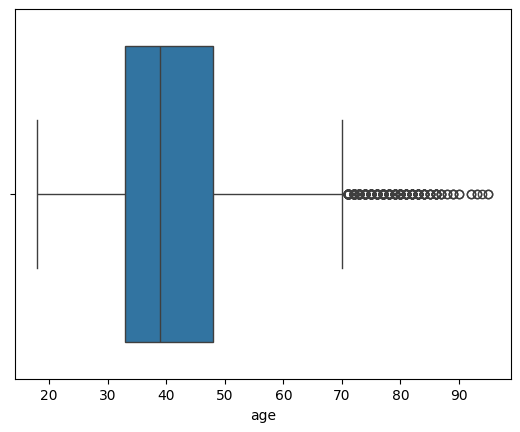

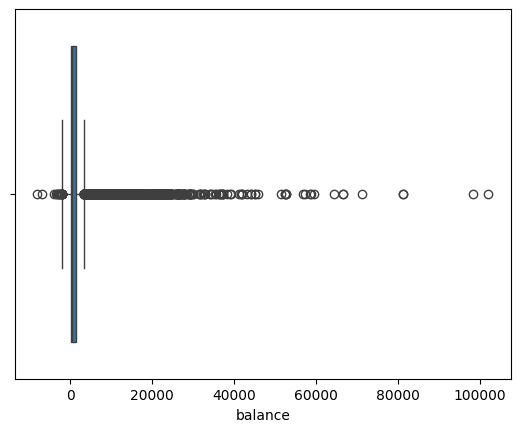

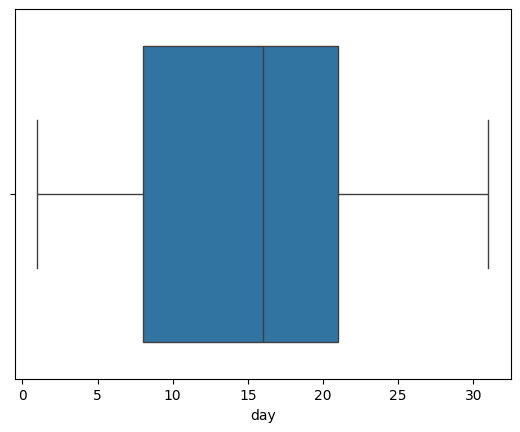

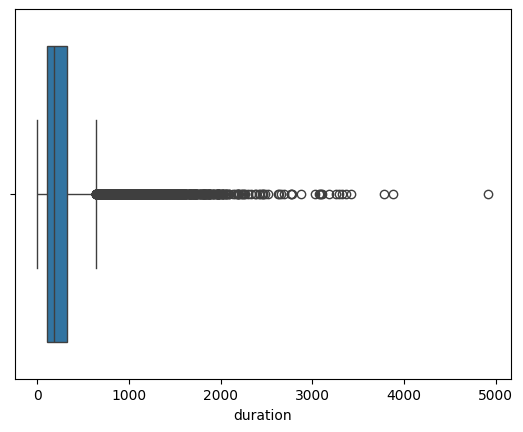

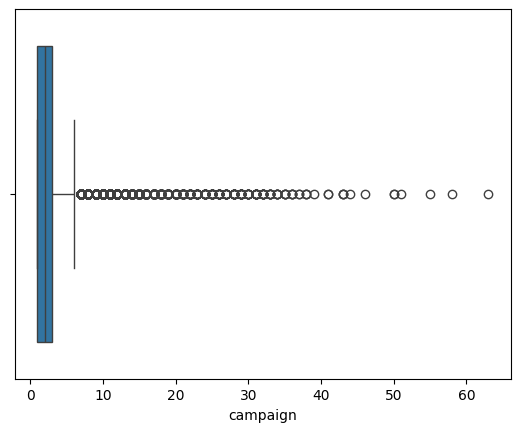

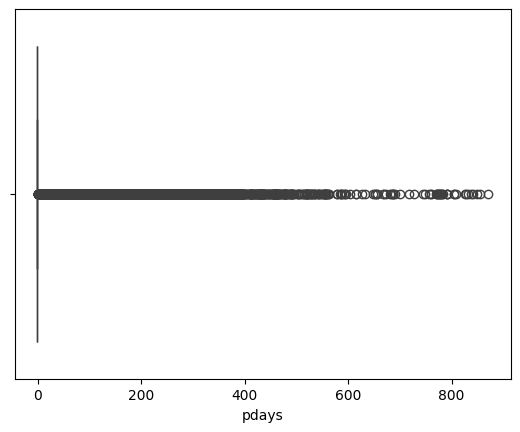

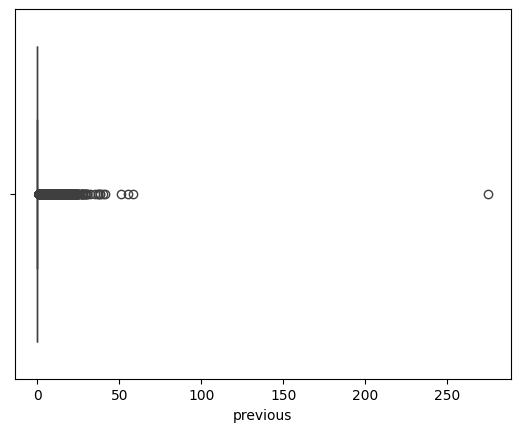

In [100]:
# Boxplot to identify the outliers
for i in data.select_dtypes(include='number').columns:
    sns.boxplot(data=data, x= i)
    plt.show()

In [101]:
# #scatter plot to understand the relationship between the variables
# for i in ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']:
#     sns.scatterplot(data=data, x=i, y=data['y'])
#     plt.show() 

In [102]:
data.select_dtypes(include='number').columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [103]:
#correlation heatmap to interpreat the realationship and mulitcollinearity 
s = data.select_dtypes(include='number').corr()

<Axes: >

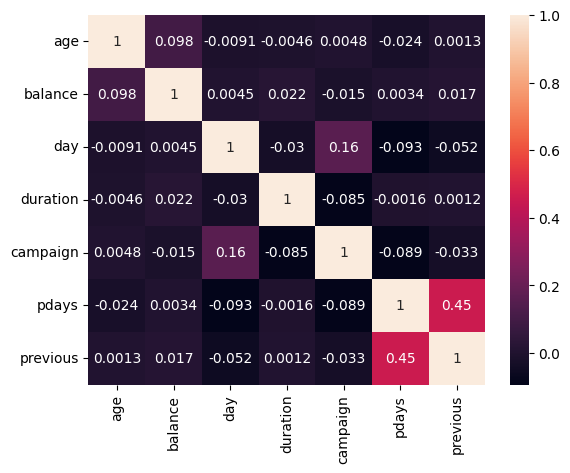

In [104]:
sns.heatmap(s, annot=True)

## Missing Value Treatment

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [106]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values
for col in data.columns:
    if data[col].isnull().sum() > 0:
        # For categorical columns
        if data[col].dtype == 'object':
            data[col].fillna(data[col].mode()[0], inplace=True) 
        
        else:
            data[col].fillna(data[col].median(), inplace=True)  # Fill numerical with median

print("Missing values treated.")


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Missing values treated.


In [107]:
# # categarical and descrede use mode

# # For categorical columns
# categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome','default', 'housing', 'loan']
# for col in categorical_columns:
#     data[col] = data[col].fillna(data[col].mode()[0])

# #For discrete columns
# discrete_columns = ['age','day',]
# for col in discrete_columns:
#     data[col] = data[col].fillna(data[col].mode()[0])

# # For continuous numeric columns
# numeric_columns = ['balance', 'duration', 'campaign', 'pdays', 'previous' ]
# for col in numeric_columns:
#     data[col] = data[col].fillna(data[col].mean() )  # or use median(), depending on the dataset


In [108]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Outlier Treatment

In [109]:
for col in ['age', 'balance', 'campaign', 'duration']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    data[col] = np.where(data[col] < lower_limit, lower_limit, data[col])
    data[col] = np.where(data[col] > upper_limit, upper_limit, data[col])

    # Convert back to integer if the column originally contained integers
    if data[col].dtype == 'int64':
        data[col] = data[col].astype(int)


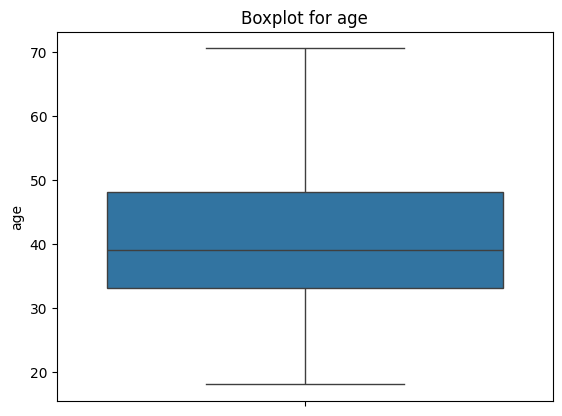

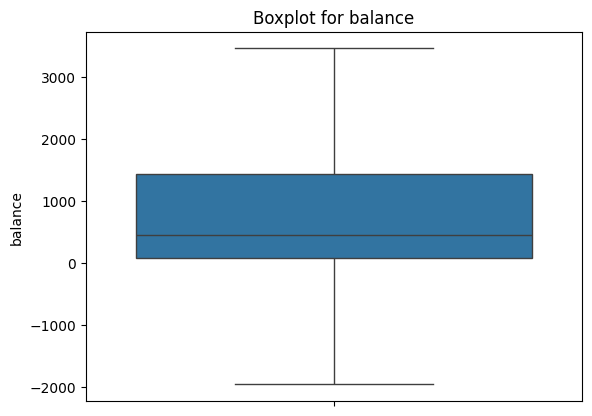

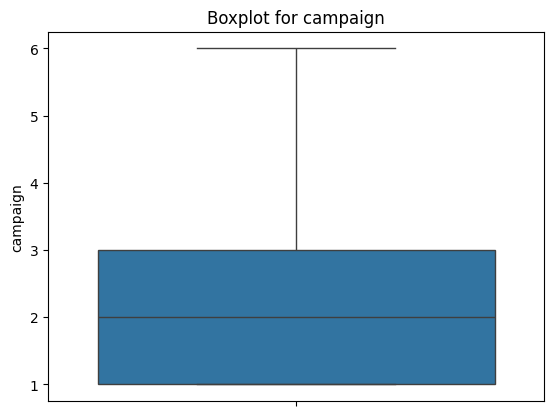

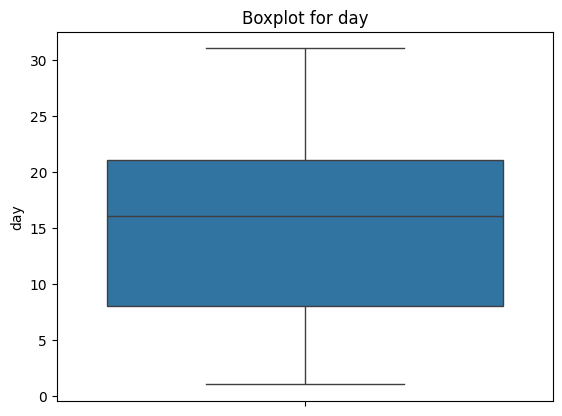

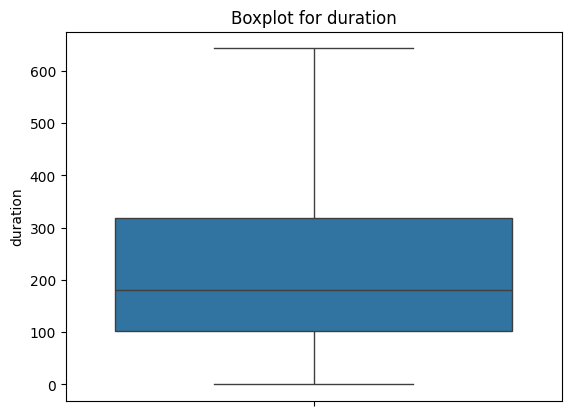

In [110]:

for col in ['age', 'balance', 'campaign', 'day', 'duration']:
    sns.boxplot(data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


## Duplicate and Garbage value treatment

In [111]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates
data = data.drop_duplicates()

Number of duplicate rows: 0


## Encoding the data

In [112]:
# Binary Features
binary_columns = ['default', 'housing', 'loan', 'y']

for col in binary_columns:
    data[col] = data[col].map({'yes': 1, 'no': 0})


In [113]:
# Categorical Features
categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome'] 

data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  float64
 1   default              45211 non-null  int64  
 2   balance              45211 non-null  float64
 3   housing              45211 non-null  int64  
 4   loan                 45211 non-null  int64  
 5   day                  45211 non-null  int64  
 6   duration             45211 non-null  float64
 7   campaign             45211 non-null  float64
 8   pdays                45211 non-null  int64  
 9   previous             45211 non-null  int64  
 10  y                    45211 non-null  int64  
 11  job_blue-collar      45211 non-null  bool   
 12  job_entrepreneur     45211 non-null  bool   
 13  job_housemaid        45211 non-null  bool   
 14  job_management       45211 non-null  bool   
 15  job_retired          45211 non-null 